# 1. Core exercise

Importing libraries:

In [1]:
# Standard libraries
import argparse
from collections import Counter
import concurrent.futures

# Third party imports
from Bio import SeqIO

Defining libraries for reading FASTA files and counting the symbols inside them:

In [ ]:
def fasta_reader(path_to_file: str, threads: int) -> None:
    """
    Reads a FASTA file and counts the number of symbols in each record
    @param path_to_file: str, path to FASTA file
    @param threads: str, number of threads
    @return: None, prints the results
    """
    # Opens the FASTA file and the processes
    with open(path_to_file) as handle, concurrent.futures.ProcessPoolExecutor(max_workers=threads) as executor:
        executor.map(rec_symbol_counter, SeqIO.parse(handle, "fasta"))


def rec_symbol_counter(rec: SeqRecord):
    """
    Counts the number of symbols of a nucleotide FASTA sequence record
    @param rec: Bio.SeqRecord.SeqRecord, FASTA record
    @return: None, prints the results
    """
    # Counts the symbols
    symbol_count = dict(Counter(rec.seq))

    # Generates output string
    symbol_str = ", ".join(f"{key}={value}" for key, value in symbol_count.items())
    print(f"Contig {rec.id + ':':<20}{symbol_str}")

In [ ]:
%%time
fasta_reader("GRCh38_latest_genomic.fna", 4)

Command line using command `time`.

Example code from command line:

In [ ]:
!time python parallel_programming.py -f GRCh38_latest_genomic.fna -t 4

1 thread:
* real	13m29,141s
* user	13m36,515s
* sys	0m10,952s

2 threads:
* real	9m21,067s
* user	18m54,030s
* sys	0m14,113s

4 threads:
* real	7m15,784s`
* user	28m49,403s
* sys	0m20,510s

# 2. Additional exercise

Reproducing interesting plot:

In [18]:
import time
import multiprocessing
import random

import matplotlib.pyplot as plt
import seaborn as sns

In [93]:
def do_work(num):
    """
    Multiplies random numbers num-times
    @param num: int
    @return: None
    """
    for _ in range(num):
        random.randint(1, 40) ** random.randint(1, 20)


def measure_proc_time_dependence(func, *args):
    """
    Measures the runtime of function for different number of processes (from 0 to 40)
    @param func: function
    @param args: arguments for the function
    @return: runtimes, list
    """
    runtimes = []
    n_procs = list(range(41))

    # Measuring runtime for different number of processess
    for n_proc in n_procs:
        start_time = time.perf_counter()
        procs = [multiprocessing.Process(target=func, args=args) for _ in range(n_proc)]
        for proc in procs:
            proc.start()
        for proc in procs:
            proc.join()
        runtimes.append(time.perf_counter() - start_time)
    return runtimes


def plot_runtimes(runtimes, n_procs=list(range(41))):
    """
    Plots the runtime of a function against the number of processes
    @param runtimes: list, runtimes of a function
    @param n_procs: list, processes (default from 0 to 40)
    @return: Shows the plot
    """
    sns.set(rc={'figure.figsize': (15, 10)})
    sns.lineplot(x=n_procs, y=runtimes)
#     for x in range(6, 40, 6):
#         plt.axvline(x=x, c='r', linestyle='--')
    plt.xticks(n_procs)
    plt.xlabel("Number of processes")
    plt.ylabel("Runtime, [sec]")
    plt.show()


In [89]:
runtimes_4 = measure_proc_time_dependence(do_work, 10**4)
runtimes_5 = measure_proc_time_dependence(do_work, 10**5)
runtimes_6 = measure_proc_time_dependence(do_work, 10**6)

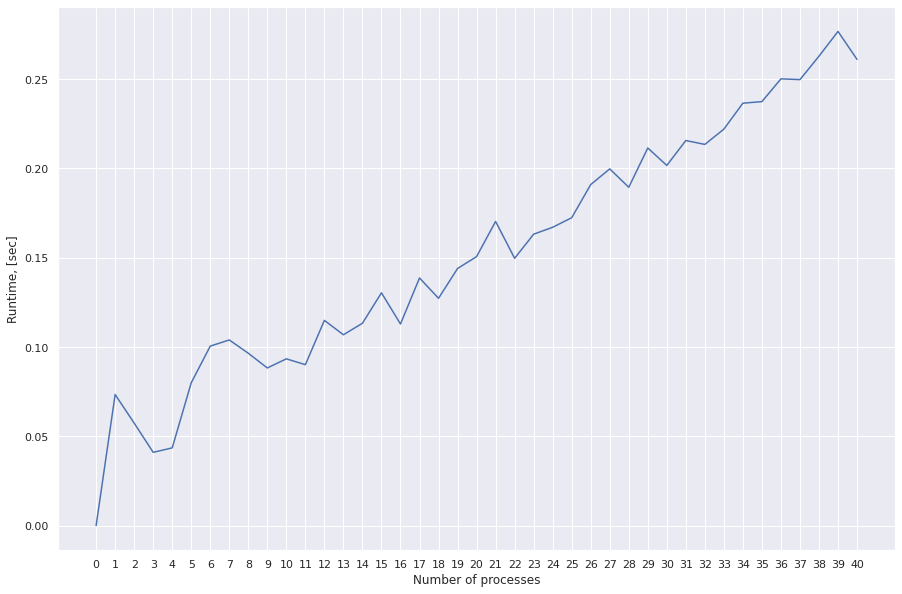

In [94]:
plot_runtimes(runtimes_4)

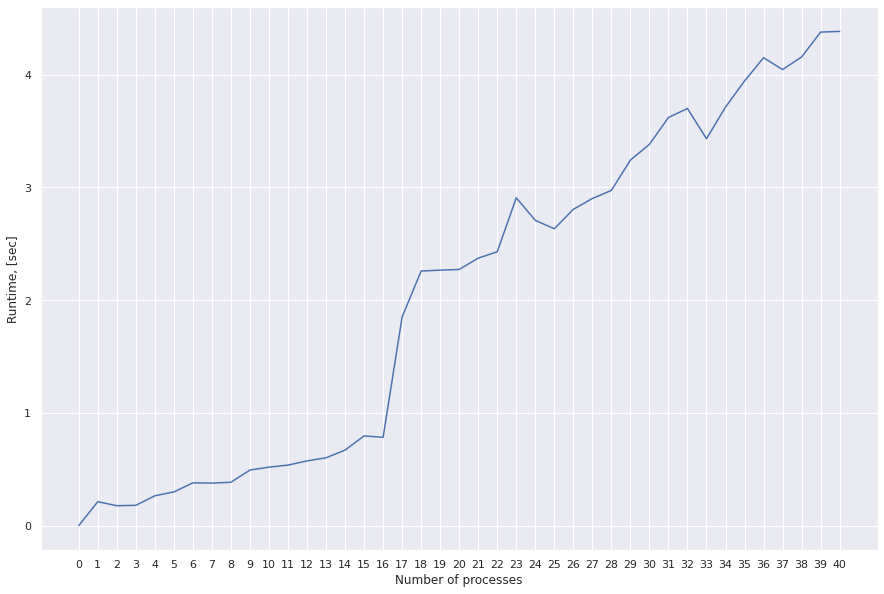

In [95]:
plot_runtimes(runtimes_5)

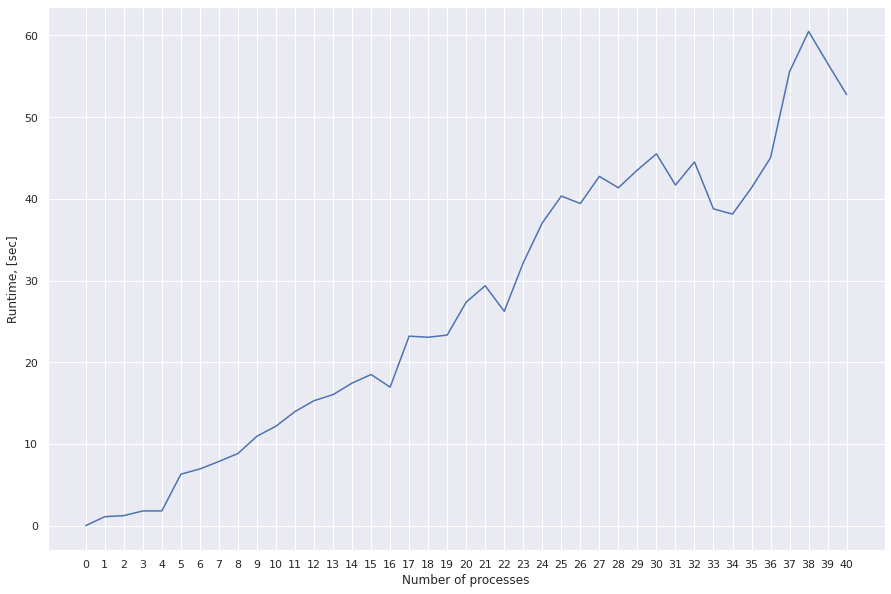

In [96]:
plot_runtimes(runtimes_6)

As we can see the number of the runtime grows linearly with the number of processes - the program. At some number of processes there are observable jumps - possibly relating to the number of cores in the computer. As if we give in more processes than there are cores in the computer - some of them have to finish before the other one starts. [See](https://stackoverflow.com/questions/29089282/multiprocessing-more-processes-than-cpu-count).